# Experimental Results on the COVID19 data

## Import of the libraries and our package

In [1]:
import numpy as np
import numpy.linalg as npl
import numpy.random as npr

import scipy as sp
import scipy.linalg as spl
import scipy.stats as sps
import time
import pandas as pd


import matplotlib.pyplot as plt

In [3]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2


from covid import * #allows us to use our functions directly

## Test of the PD3S algorrithm to compute the MAP 

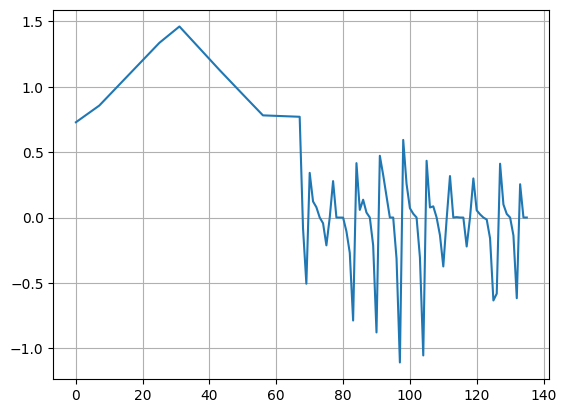

In [6]:
plt.figure()
Z,phi=load_data('stuff/Z.csv', 'stuff/Phi.csv')
MAP= PD3S(Z,phi)
plt.plot(MAP)
plt.grid()
plt.show()

## Test of the Randow walk method on the data

In [7]:
Z,phi=load_data('stuff/Z.csv', 'stuff/Phi.csv')
lambda_O = 0.05
lambda_R = 3.5*np.std(Z)
T=len(Z)
theta_tab, accepts, gammas,end_burn_in=MHRW(T,Z,phi,lambda_R,lambda_O,niter=1e6,method="source")

49999
99999
149999
199999
249999
End of the burn-in
299999
349999
399999
449999
499999
549999
599999
649999
699999
749999
799999
849999
899999
949999
999999


In [8]:
#Saving simulation results
np.savez("resultats2MILsource.npz", theta_tab=theta_tab, accepts=accepts, gammas=gammas)

In [9]:
theta_tab, accepts, gammas,end_burn_in=MHRW(T,Z,phi,lambda_R,lambda_O,niter=1e6,method="image")
np.savez("resultats2MILimage.npz", theta_tab=theta_tab, accepts=accepts, gammas=gammas)

49999
99999
149999
199999
249999
299999
349999
End of the burn-in
399999
449999
499999
549999
599999
649999
699999
749999
799999
849999
899999
949999
999999


In [13]:
theta_tab, accepts, gammas,end_burn_in=MHSubdiff(T,Z,phi,lambda_R,lambda_O,niter=1e6,method="source")
np.savez("resultats2MILsubdiff_source.npz", theta_tab=theta_tab, accepts=accepts, gammas=gammas)

50000
100000
150000
200000
250000
300000
350000
400000
450000
End of the burn-in
499999
549999
599999
649999
699999
749999
799999
849999
899999
949999
999999


In [16]:
#loading results
data_source= np.load("resultats2MILsource.npz")
theta_tab_source = data_source["theta_tab"]
accepts_source=data_source["accepts"]
gammas_source=data_source["gammas"]

In [17]:
data_image= np.load("resultats2MILimage.npz")
theta_tab_image = data_image["theta_tab"]
accepts_image=data_image["accepts"]
gammas_image=data_image["gammas"]

In [22]:
data_subdiff_image= np.load("resultats2MILsubdiff_image.npz")
theta_tab_subdiff_image = data_subdiff_image["theta_tab"]
accepts_subdiff_image=data_subdiff_image["accepts"]
gammas_subdiff_image=data_subdiff_image["gammas"]

In [14]:
data_subdiff_source= np.load("resultats2MILsubdiff_source.npz")
theta_tab_subdiff_source = data_subdiff_source["theta_tab"]
accepts_subdiff_source=data_subdiff_source["accepts"]
gammas_subdiff_source=data_subdiff_source["gammas"]

In [ ]:
#data_prox_image= np.load("resultats2MILprox_image.npz")
#theta_tab_prox_image = data_prox_image["theta_tab"]
#accepts_prox_image=data_prox_image["accepts"]
#gammas_prox_image=data_prox_image["gammas"]

In [ ]:
#data_prox_source= np.load("resultats2MILprox_source.npz")
#theta_tab_prox_source = dataprox_source["theta_tab"]
#accepts_prox_source=data_prox_source["accepts"]
#gammas_prox_source=data_prox_source["gammas"]

In [19]:
lambda_O = 0.05
lambda_R = 3.5*np.std(Z)
T=len(Z)
a = 0.73597
b = 0.73227
barsh=Buildbarsh(T,a,b)
D=BuildD(T)
C = np.diag(phi)
MAPR,MAPO=np.split(MAP,2)

R_image,O_image=np.split(theta_tab_image[::1000],2,axis=1)
R_source,O_source=np.split(theta_tab_source[::1000],2,axis=1)
R_subdiff_source,O_subdiff_source=np.split(theta_tab_subdiff_source[::1000],2,axis=1)
#R_subdiff_image,O_subdiff_image=np.split(theta_tab_subdiff_image[::1000],2,axis=1)
#R_prox_source,O_prox_source=np.split(theta_tab_prox_source[::1000],2,axis=1)
#R_prox_image,O_prox_image=np.split(theta_tab_prox_image[::1000],2,prox


logpi_max=log_pi(MAP, phi,Z, lambda_R, D, barsh, lambda_O,phi,C)
log_pi_image = np.apply_along_axis(lambda theta: log_pi(theta, phi, Z, lambda_R, D, barsh, lambda_O, phi, C),axis=1,arr=theta_tab_image[::1000])
log_pi_imageR = np.apply_along_axis(lambda theta_R: log_pi_with_fixed_O(theta_R, MAPO,phi,Z, lambda_R, D, barsh, lambda_O,phi,C),axis=1,arr=R_image)
log_pi_imageO = np.apply_along_axis(lambda theta_O: log_pi_with_fixed_R(theta_O, MAPR,phi,Z, lambda_R, D, barsh, lambda_O,phi,C),axis=1,arr=O_image)
log_pi_source = np.apply_along_axis(lambda theta: log_pi(theta, phi, Z, lambda_R, D, barsh, lambda_O, phi, C),axis=1,arr=theta_tab_source[::1000])
log_pi_sourceR = np.apply_along_axis(lambda theta_R: log_pi_with_fixed_O(theta_R, MAPO,phi,Z, lambda_R, D, barsh, lambda_O,phi,C),axis=1,arr=R_source)
log_pi_sourceO = np.apply_along_axis(lambda theta_O: log_pi_with_fixed_R(theta_O, MAPR,phi,Z, lambda_R, D, barsh, lambda_O,phi,C),axis=1,arr=O_source)
log_pi_subdiff_source = np.apply_along_axis(lambda theta: log_pi(theta, phi, Z, lambda_R, D, barsh, lambda_O, phi, C),axis=1,arr=theta_tab_subdiff_source[::1000])
log_pi_subdiff_sourceR = np.apply_along_axis(lambda theta_R: log_pi_with_fixed_O(theta_R, MAPO,phi,Z, lambda_R, D, barsh, lambda_O,phi,C),axis=1,arr=R_subdiff_source)
log_pi_subdiff_sourceO = np.apply_along_axis(lambda theta_O: log_pi_with_fixed_R(theta_O, MAPR,phi,Z, lambda_R, D, barsh, lambda_O,phi,C),axis=1,arr=O_subdiff_source)
#log_pi_subdiff_image = np.apply_along_axis(lambda theta: log_pi(theta, phi, Z, lambda_R, D, barsh, lambda_O, phi, C),axis=1,arr=theta_tab_subdiff_image[::1000])
#log_pi_subdiff_imageR = np.apply_along_axis(lambda theta_R: log_pi_with_fixed_O(theta_R, MAPO,phi,Z, lambda_R, D, barsh, lambda_O,phi,C),axis=1,arr=R_subdiff_image)
#log_pi_subdiff_imageO = np.apply_along_axis(lambda theta_O: log_pi_with_fixed_R(theta_O, MAPR,phi,Z, lambda_R, D, barsh, lambda_O,phi,C),axis=1,arr=O_subdiff_image)
#log_pi_prox_image = np.apply_along_axis(lambda theta: log_pi(theta, phi, Z, lambda_R, D, barsh, lambda_O, phi, C),axis=1,arr=theta_tab_prox_image[::1000])
#log_pi_prox_imageR = np.apply_along_axis(lambda theta_R: log_pi_with_fixed_O(theta_R, MAPO,phi,Z, lambda_R, D, barsh, lambda_O,phi,C),axis=1,arr=R_prox_image)
#log_pi_prox_imageO = np.apply_along_axis(lambda theta_O: log_pi_with_fixed_R(theta_O, MAPR,phi,Z, lambda_R, D, barsh, lambda_O,phi,C),axis=1,arr=O_prox_image)
#log_pi_prox_source = np.apply_along_axis(lambda theta: log_pi(theta, phi, Z, lambda_R, D, barsh, lambda_O, phi, C),axis=1,arr=theta_tab_prox_source[::1000])
#log_pi_prox_sourceR = np.apply_along_axis(lambda theta_R: log_pi_with_fixed_O(theta_R, MAPO,phi,Z, lambda_R, D, barsh, lambda_O,phi,C),axis=1,arr=R_prox_source)
#log_pi_prox_sourceO = np.apply_along_axis(lambda theta_O: log_pi_with_fixed_R(theta_O, MAPR,phi,Z, lambda_R, D, barsh, lambda_O,phi,C),axis=1,arr=O_prox_source)


C:\Users\arman\Desktop\INSA Toulouse\4A\PIR\mcmc-epidemic\covid.py:24: RuntimeWarning: invalid value encountered in log
  log_pi_val = -np.sum(temp_c - Z*np.log(temp_c)) - lambda_R*np.linalg.norm(D@R + shR, ord = 1) - lambda_O*np.linalg.norm(C@O+shO, ord = 1)


<>:11: SyntaxWarning: invalid escape sequence '\ '
<>:22: SyntaxWarning: invalid escape sequence '\ '
<>:33: SyntaxWarning: invalid escape sequence '\ '
<>:44: SyntaxWarning: invalid escape sequence '\p'
<>:54: SyntaxWarning: invalid escape sequence '\p'
<>:11: SyntaxWarning: invalid escape sequence '\ '
<>:22: SyntaxWarning: invalid escape sequence '\ '
<>:33: SyntaxWarning: invalid escape sequence '\ '
<>:44: SyntaxWarning: invalid escape sequence '\p'
<>:54: SyntaxWarning: invalid escape sequence '\p'
C:\Users\arman\AppData\Local\Temp\ipykernel_11232\3261728534.py:11: SyntaxWarning: invalid escape sequence '\ '
  axes[0].set_title("Relative distance to the maximum of the $ln \ \pi$ distribution")
C:\Users\arman\AppData\Local\Temp\ipykernel_11232\3261728534.py:22: SyntaxWarning: invalid escape sequence '\ '
  axes[1].set_title("Relative distance to the maximum of the $ln \ \pi$ distribution of the R component")
C:\Users\arman\AppData\Local\Temp\ipykernel_11232\3261728534.py:33: Synta

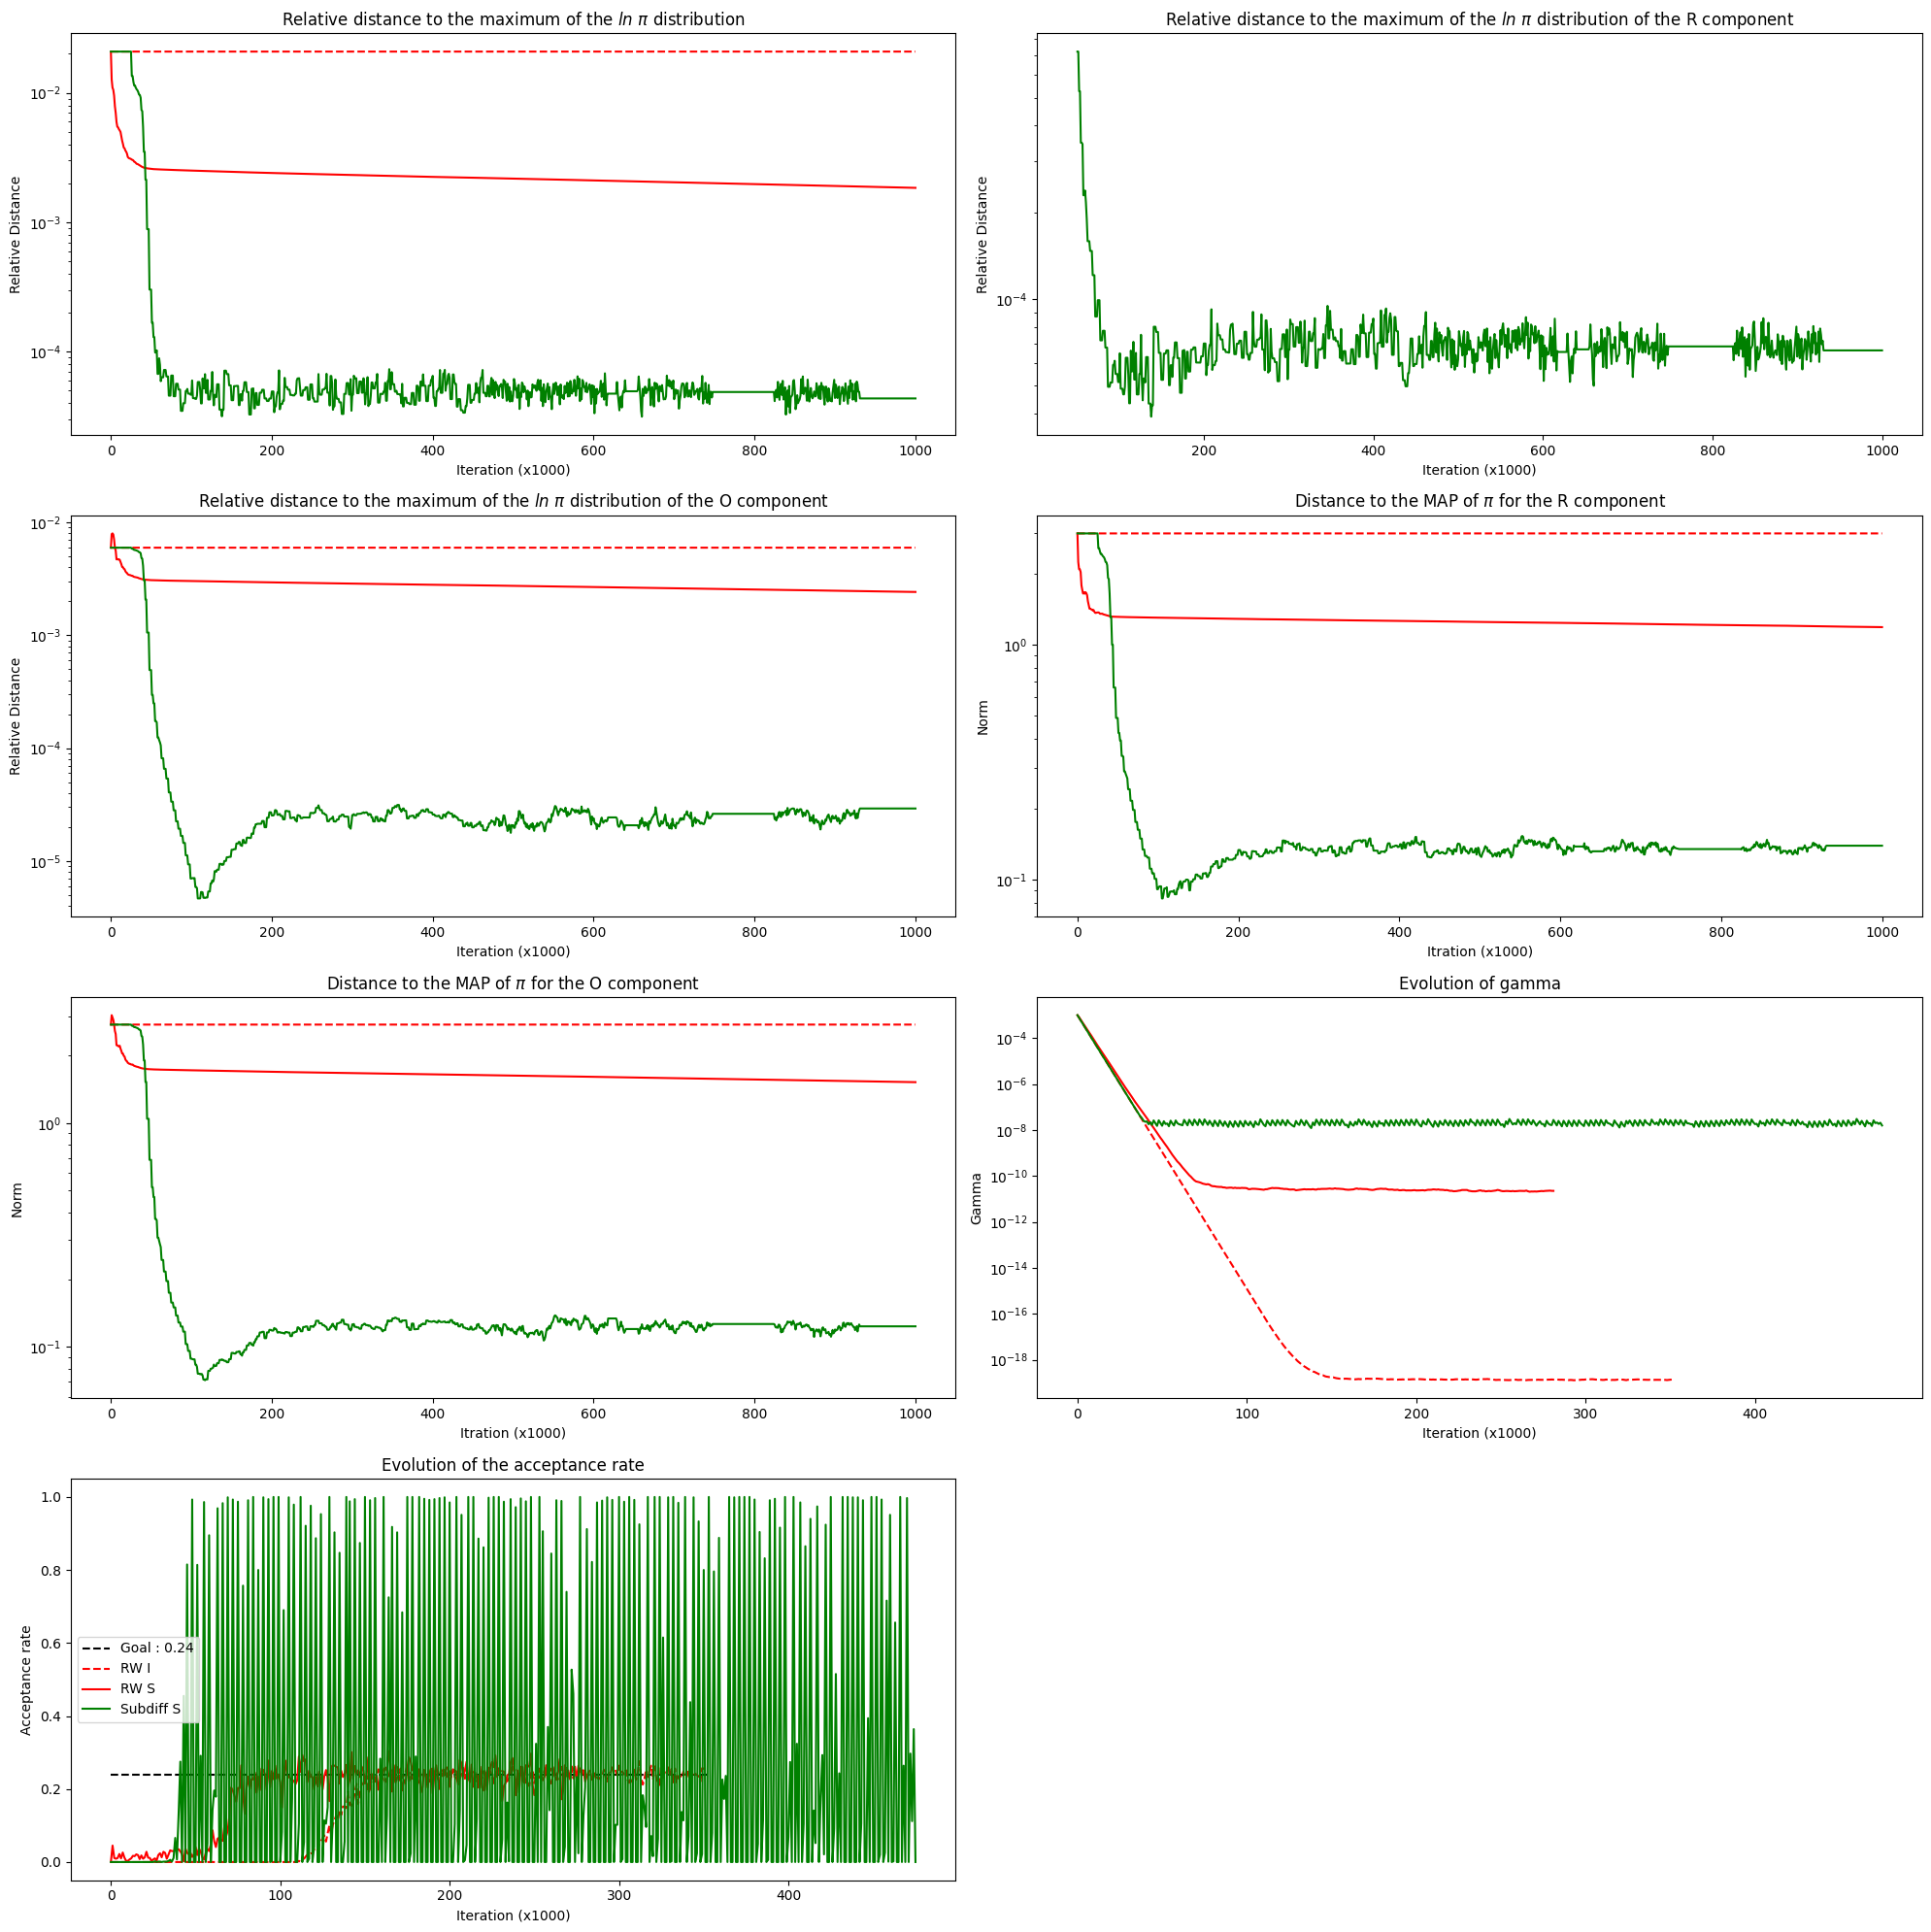

In [21]:

fig, axes = plt.subplots(4, 2, figsize=(20, 20))
axes = axes.flatten()  # plus simple pour indexer

# 1. Distance au max de la densité log_pi globale
axes[0].semilogy(np.abs(log_pi_image - logpi_max)/logpi_max,color="red",linestyle="--",label="RW I")
axes[0].semilogy(np.abs(log_pi_source - logpi_max)/logpi_max,color="red",label="RW S")
axes[0].semilogy(np.abs(log_pi_subdiff_source - logpi_max)/logpi_max,color="green",label="Subdiff S")
#axes[0].semilogy(np.abs(log_pi_subdiff_image - logpi_max)/logpi_max,color="green",linestyle="--",label="Subdiff I")
#axes[0].semilogy(np.abs(log_pi_prox_source - logpi_max)/logpi_max,color="orange",label="Prox S")
#axes[0].semilogy(np.abs(log_pi_prox_image - logpi_max)/logpi_max,color="orange",linestyle="--",label="Prox I")
axes[0].set_title("Relative distance to the maximum of the $ln \ \pi$ distribution")
axes[0].set_xlabel("Iteration (x1000)")
axes[0].set_ylabel("Relative Distance")

# 1. Distance au max de la densité log_pi pour R
axes[1].semilogy(np.abs(log_pi_imageR - logpi_max)/logpi_max,color="red",linestyle="--",label="RW I")
axes[1].semilogy(np.abs(log_pi_sourceR - logpi_max)/logpi_max,color="red",label="RW S")
axes[1].semilogy(np.abs(log_pi_subdiff_sourceR - logpi_max)/logpi_max,color="green",label="Subdiff S")
#axes[1].semilogy(np.abs(log_pi_subdiff_imageR - logpi_max)/logpi_max,color="green",linestyle="--",label="Subdiff I")
#axes[1].semilogy(np.abs(log_pi_prox_sourceR - logpi_max)/logpi_max,color="orange",label="Prox S")
#axes[1].semilogy(np.abs(log_pi_prox_imageR - logpi_max)/logpi_max,color="orange",linestyle="--",label="Prox I")
axes[1].set_title("Relative distance to the maximum of the $ln \ \pi$ distribution of the R component")
axes[1].set_xlabel("Iteration (x1000)")
axes[1].set_ylabel("Relative Distance")

# 1. Distance au max de la densité log_pi pour O
axes[2].semilogy(np.abs(log_pi_imageO - logpi_max)/logpi_max,color="red",linestyle="--",label="RW I")
axes[2].semilogy(np.abs(log_pi_sourceO - logpi_max)/logpi_max,color="red",label="RW S")
axes[2].semilogy(np.abs(log_pi_subdiff_sourceO - logpi_max)/logpi_max,color="green",label="Subdiff S")
#axes[2].semilogy(np.abs(log_pi_subdiff_imageO - logpi_max)/logpi_max,color="green",linestyle="--",label="Subdiff I")
#axes[2].semilogy(np.abs(log_pi_prox_sourceO - logpi_max)/logpi_max,color="orange",label="Prox S")
#axes[2].semilogy(np.abs(log_pi_prox_imageO - logpi_max)/logpi_max,color="orange",linestyle="--",label="Prox I")
axes[2].set_title("Relative distance to the maximum of the $ln \ \pi$ distribution of the O component")
axes[2].set_xlabel("Iteration (x1000)")
axes[2].set_ylabel("Relative Distance")

# 2. Distance à l'argmax de la densité log_pi pour R
axes[3].semilogy(np.linalg.norm(R_image - MAPR, axis=1),color="red",linestyle = "--",label="RW I")
axes[3].semilogy(np.linalg.norm(R_source - MAPR, axis=1),color="red",label="RW S")
axes[3].semilogy(np.linalg.norm(R_subdiff_source - MAPR, axis=1),color="green",label="RW S")
#axes[3].semilogy(np.linalg.norm(R_subdiff_image - MAPR, axis=1),color="green",linestyle = "--",label="Subdiff I")
#axes[3].semilogy(np.linalg.norm(R_prox_source - MAPR, axis=1),color="orange",label="Prox S")
#axes[3].semilogy(np.linalg.norm(R_prox_image - MAPR, axis=1),color="orange",linestyle = "--",label="Prox I")
axes[3].set_title("Distance to the MAP of $\pi$ for the R component")
axes[3].set_xlabel("Itration (x1000)")
axes[3].set_ylabel("Norm")
# 2. Distance à l'argmax de la densité log_pi pour O
axes[4].semilogy(np.linalg.norm(O_image - MAPO, axis=1),color="red",linestyle = "--",label="RW I")
axes[4].semilogy(np.linalg.norm(O_source - MAPO, axis=1),color="red",label="RW S")
axes[4].semilogy(np.linalg.norm(O_subdiff_source - MAPO, axis=1),color="green",label="RW S")
#axes[4].semilogy(np.linalg.norm(O_subdiff_image - MAPO, axis=1),color="green",linestyle = "--",label="Subdiff I")
#axes[4].semilogy(np.linalg.norm(O_prox_source - MAPO, axis=1),color="orange",label="Prox S")
#axes[4].semilogy(np.linalg.norm(O_prox_image - MAPO, axis=1),color="orange",linestyle = "--",label="Prox I")
axes[4].set_title("Distance to the MAP of $\pi$ for the O component")
axes[4].set_xlabel("Itration (x1000)")
axes[4].set_ylabel("Norm")

# 4. Évolution de gamma
axes[5].semilogy(gammas_image,color="red",linestyle = "--",label="RW I")
axes[5].semilogy(gammas_source,color="red",label="RW S")
#axes[5].semilogy(gammas_subdiff_image,color="green",linestyle = "--",label="Subdiff I")
axes[5].semilogy(gammas_subdiff_source,color="green",label="RW S")
#axes[5].semilogy(gammas_prox_image,color="orange",linestyle = "--",label="Prox I")
#axes[5].semilogy(gammas_prox_source,color="orange",label="Prox S")
axes[5].set_title("Evolution of gamma")
axes[5].set_xlabel("Iteration (x1000)")
axes[5].set_ylabel("Gamma")

# 5. Évolution du taux d’acceptation
axes[6].hlines(0.24, xmin=0, xmax=len(accepts_image), linestyle='--', color='black', label="Goal : 0.24")
axes[6].plot(accepts_image,color="red",linestyle = "--",label="RW I")
axes[6].plot(accepts_source,color="red",label="RW S")
#axes[6].plot(accepts_subdiff_image,color="green",linestyle = "--",label="Subdiff I")
axes[6].plot(accepts_subdiff_source,color="green",label="Subdiff S")
#axes[6].plot(accepts_prox_image,color="orange",linestyle = "--",label="Prox I")
#axes[6].plot(accepts_prox_source,color="orange",label="Prox S")
axes[6].set_title("Evolution of the acceptance rate")
axes[6].set_xlabel("Iteration (x1000)")
axes[6].set_ylabel("Acceptance rate")
axes[6].legend()

# Supprimer le dernier subplot vide (le 6e)
fig.delaxes(axes[7])

plt.tight_layout()
plt.show()


## Estimation du taux de reproduction

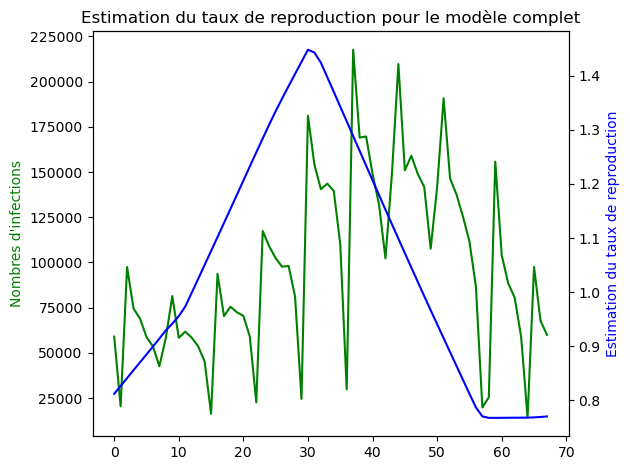

In [10]:
#Take the median of the second half of the simulations as estimator
R,O=np.split(theta_tab_image,2,axis=1)
R=R[int(len(R)/2):,:]
R_hat=np.quantile(R,0.5,axis=0)
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()  # deuxième axe y indépendant mais même axe x

ax1.plot(Z, 'g-')
ax2.plot(R_hat, 'b-')

ax1.set_ylabel('Nombres d\'infections', color='g')
ax2.set_ylabel('Estimation du taux de reproduction', color='b')
plt.title("Estimation du taux de reproduction pour le modèle complet")

fig.tight_layout()
plt.show()

## Modèle sans pénalité et sans correction $O$

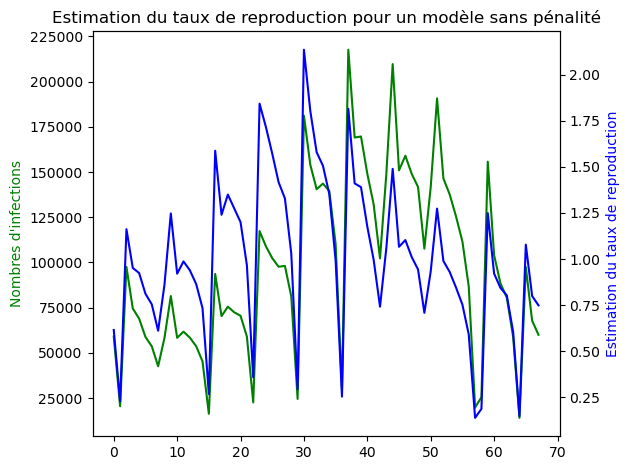

In [14]:
Z,phi=load_data('stuff/Z.csv', 'stuff/Phi.csv')
lambda_O = 0
lambda_R = 0
T=len(Z)
R_hat=Z/phi

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()  # deuxième axe y indépendant mais même axe x

ax1.plot(Z, 'g-')
ax2.plot(R_hat, 'b-')

ax1.set_ylabel('Nombres d\'infections', color='g')
ax2.set_ylabel('Estimation du taux de reproduction', color='b')
plt.title("Estimation du taux de reproduction pour un modèle sans pénalité")

fig.tight_layout()
plt.show()

## Test normalisation

In [ ]:
cible=np.array([2,1,3,2,1])
res=np.array([2.01,0.9,3.1,6,1.1])
print((res-cible)/cible)
mean_relative=np.linalg.norm((res-cible)/cible)
classic_norm=np.linalg.norm(res-cible)/np.linalg.norm(cible)
print(f"Norm of relative distance per component : {mean_relative}")
print(f"Classic normalisation : {classic_norm}")